# 2. 신경망의 수학적 구성 요소

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 2장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[신경망의 수학적 구성 요소](https://codingalzi.github.io/dlp2/mathematical_building_blocks.html)를 
참고한다.

## 2.1. 신경망 모델 활용법 소개

**케라스로 MNIST 데이터셋 불러오기**

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

훈련셋 정보

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

테스트셋 정보

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 모델의 구조 지정**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**신경망 모델 컴파일**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 전처리**

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255   # 0과 1사이의 값
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255     # 0과 1사이의 값

**모델 훈련**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.2598 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9894


**모델 활용: 예측하기**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

0번 이미지에 대한 예측값

In [15]:
predictions[0]

array([3.7880007e-08, 3.5201550e-11, 9.4983761e-07, 5.7442798e-05,
       2.7082888e-11, 2.9550441e-07, 6.1064072e-13, 9.9993896e-01,
       5.4389922e-08, 2.3284465e-06], dtype=float32)

가장 높은 확률값을 갖는 인덱스는 7.

In [16]:
predictions[0].argmax()

7

0번 이미지가 가리키는 숫자가 7일 확률이 99.98% 정도.

In [17]:
predictions[0][7]

0.99993896

실제로 첫째 이미지의 레이블이 7임.

In [18]:
test_labels[0]

7

**모델 성능 테스트**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0649 - accuracy: 0.9793
test_acc: 0.9793000221252441


## 2.2 신경망에 사용되는 데이터 표현

앞서 __텐서__(tensor)라고 불리는 넘파이 어레이(NumPy array)를 이용하여
데이터를 표현하였다.

텐서는 기본적으로 숫자를 담은 컨테이너(container)이며,
행렬의 경우 2 개의 차원으로 구성된 텐서로 표현된다. 
텐서의 차원은 임의로 많을 수 있으며, 텐서에 사용되는 차원을 __축__(axis)이라 부르기도 한다. 
차원의 수를 랭크(rank)라 부른다.
즉 행렬은 랭크가 2인 텐서이다.

__주의사항__: tensorflow 라이브러리가 제공하는 `Tensor` 자료형은 NumPy의 어레이
자료형과 매우 비슷하다. 다만 `Tensor`는 GPU를 활용한 연산을 지원하고
넘파이 어레이는 그렇지 않다. 
하지만 두 자료형 사이의 형변환이 존재하여 keras 모델 훈련 등 
필요할 때 적절한 형변환이 자동으로 이루어진다. 

### 스칼라(0D 텐서)

숫자 하나로 이루어진 텐서를 __스칼라__(scalar)라고 하며,
차원이 없다는 의미에서 0D 텐서로 부른다. 
넘파이의 경우 `float32`, `float64` 등이 스칼라이다.

In [18]:
import numpy as np

x = np.array(12)
x

array(12)

텐서의 랭크는 `ndim` 속성이 가리킨다.

In [19]:
x.ndim

0

### 벡터 (1D 텐서)

벡터는 1개의 차원(축)을 갖는다. 
넘파이의 경우 1차원 어레이가 벡터이다.

In [20]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

__주의사항__: __벡터의 길이__를 __차원__이라 부르기도 하는 점에 주의해야 한다.
예를 들어, 위 벡터는 5D 벡터이다. 

### 행렬(2D 텐서)

행렬은 동일한 크기의 벡터로 이루어진 어레이며, 
행(row)과 열(column) 두 개의 축을 갖는다. 
넘파이의 2차원 어레이가 2D 텐서이다.

In [22]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [23]:
x.ndim

2

### 3D 이상의 고차원 텐서

2D 텐서로 이루어진 어레이가 3D 텐서이며,
이 과정을 반복해서 4D 이상의 고차원 텐서도 생성할 수 있다.
딥러닝에서 다루는 텐서는 보통 최대 4D이며,
동영상 데이터를 다룰 때 5D 텐서도 사용한다.

In [24]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [25]:
x.ndim

3

### 텐서의 주요 속성


- `ndim`: 텐서에 사용된 축의 수
- `shape`: 각각의 축에 사용된 (벡터의) 차원으로 이루어진 튜플
- `dtype`: 텐서에 사용된 항목들의 (통일된) 자료형
    - `float16`, `float32`,`float64`, `int8`, `string` 등이 가장 많이 사용됨.
    - 8, 16, 32, 64 등의 숫자는 해당 숫자를 다루는 데 필요한 메모리의 비트(bit) 크기를 가리킴.
        즉, 텐서에 사용되는 항목들을 일괄된 크기의 메모리로 처리함.

MNIST 훈련 세트를 대상으로 언급된 속성을 확인해보자.
앞서 모양을 변형하였기에 다시 원본 데이터를 불러온다.

In [26]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
train_images.ndim

3

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
train_images.dtype

dtype('uint8')

**다섯 번째 이미지 확인하기**

훈련 세트에 포함된 이미지 중에서 다섯 번째 이미지를 직접 확인해보자.
이를 위해 pyplot 모듈의 `imshow()` 함수를 이용한다.

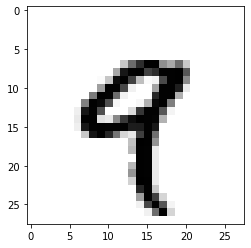

In [30]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

다섯 번째(4번 인덱스) 이미지는 실제로 숫자 9를 가리킨다.

In [31]:
train_labels[4]

9

### 넘파이를 이용한 텐서 조작

#### 인덱싱(indexing)

텐서에 포함된 특정 인덱스의 항목 선택하려면 인덱싱을 사용한다. 

In [32]:
train_labels[4]

9

#### 슬라이싱

텐서에 포함된 특정 구간에 포함된 인덱스에 해당하는 항목으로 이루어진 텐서를
생성할 때 슬라이싱을 사용한다. 

In [33]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

`:`는 지정된 축의 인덱스 전체를 대상으로 한다.
따라서 위 코드는 아래 두 코드와 동일한 기능을 수행한다.

In [34]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

이미지 전체를 대상으로 오른편 하단의 `14x14` 픽셀만 추출하려면 다음과 같이
슬라이싱을 진행한다.

In [36]:
my_slice = train_images[:, 14:, 14:]

이미지 전체를 대상으로 중앙에 위치한 `14x14` 픽셀만 추출하려면 다음과 같이
슬라이싱을 진행한다.
음의 인덱스는 끝(-1번 인덱스)에서부터 역순으로 세어진 인덱스를 가리킨다.

In [37]:
my_slice = train_images[:, 7:-7, 7:-7]

### 데이터 배치(묶음)

케라스를 포함하여 대부분의 딥러닝 모델은 훈련 세트 전체를 한꺼번에 처리하지 않고
지정된 크기(`batch_size`)의 배치(batch)로 나주어 처리한다. 
앞서 살펴본 모델의 배치 크기는 128이었다.

#### 샘플 축 또는 샘플 차원

딥러닝에 사용되는 모든 훈련 세트의 0번 축(axis 0)은 
포함된 샘플 각각을 가리키는 __샘플 축__(samples axis)이며, 
__샘플 차원__(samples dimension)이라고도 불린다.
특별히 배치 텐서와 관련해서는 0번 축(axis 0)을
__배치 축__(batch axis) 또는 __배치 차원__(batch dimension)이라고 부른다.

- 첫째 배치

In [38]:
batch = train_images[:128]

- 둘째 배치

In [39]:
batch = train_images[128:256]

- n 번째 배치

In [40]:
n = 3 # 임의의 n이라고 가정해야 함

batch = train_images[128 * n:128 * (n + 1)]

## 2.3 텐서 연산

신경망 모델의 훈련은 기본적으로 텐서와 관련된 몇 가지 연산으로 이루어진다. 
예를 들어 이전 신경망에 사용된 케라스 레이어를 살펴보자.

```python
keras.layers.Dense(512, activation="relu")
keras.layers.Dense(10, activation="softmax")
```

위 두 개의 층이 하는 일은 데이터셋의 변환이며 실제로 이루어지는 연산은 다음과 같다.

- 1층

    ```python
    output1 = relu(dot(input1, W1) + b1)
    ```
- 2층

    ```python
    output2 = softmax(dot(input2, W2) + b2)
    ```

- 점곱(`dot(input, W)`): 입력 텐서와 가중치 텐서의 곱
- 덧셈(`dot(input, W) + b`): 점곱의 결과 텐서와 벡터 `b`의 합
- `relu` 함수: `relu(x) = max(x, 0)`
- `softmax` 함수: 10개 범주 각각에 속할 확률 계산

<div align="center"><img src="https://s3-ap-northeast-2.amazonaws.com/opentutorials-user-file/module/3653/9363.png" style="width:700px;"></div>

그림 출처: [생활코딩: 한 페이지 머신러닝](https://www.opentutorials.org/module/3653/22060)

### 항목별 연산

넘파이의 어레이 연산처럼 텐서의 연산도 항목별로 이루어진다. 
예를 들어, `relu()` 함수도 각 항목에 적용되며,
실제로 아래와 같이 구현할 수 있다.

In [41]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

덧셈도 동일하다.

In [42]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

넘파이의 경우 항목별 연산을 병렬처리가 가능하며
매우 효율적으로 작동하는 저수준 언어로 구현되어 있다.
아래 두 코드는 넘파이를 활용할 때와 그렇지 않을 때의 
처리속도의 차이를 잘 보여준다.

In [43]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: {time.time() - t0:.2f}초")

Took: 0.01초


In [44]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Took: {time.time() - t0:.2f}초")

Took: 1.86초


텐서플로우 또한 GPU로 병렬 처리를 효율적으로 수행하는 항목변 연산을 지원한다.

### 브로드캐스팅(Broadcasting)

아래 식은 2D 텐서와 벡터(1D 텐서)의 합을 계산한다.

```python
dot(input, W) + b
```

차원이 다른 텐서의 합과 차를 계산하려면 모양을 먼저 맞춰주어야 한다. 
위 표현식의 계산과정에서 `b`를 먼저 `dot(input, W)`의 모양과 일치하도록
브로드캐스팅 한다.

아래 코드는 2D 텐서와 1D 텐서의 합이 이루어지는 과정을 보여준다.

In [45]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [46]:
y

array([0.94494789, 0.62418649, 0.69956643, 0.98769243, 0.79411848,
       0.64310338, 0.26149646, 0.65324474, 0.50172495, 0.7913284 ])

- `y` 텐서 2D로 변환: `(10,)` 모양의 1D 텐서를 `(1, 10)` 모양의 2D 텐서로 변환

In [47]:
y2 = np.expand_dims(y, axis=0)
y2

array([[0.94494789, 0.62418649, 0.69956643, 0.98769243, 0.79411848,
        0.64310338, 0.26149646, 0.65324474, 0.50172495, 0.7913284 ]])

- `(32, 10)` 모양의 2D 텐서로 변환: 0번 행을 32번 복사해서 추가

In [48]:
Y = np.concatenate([y2] * 32, axis=0)

In [49]:
Y.shape

(32, 10)

In [50]:
((X + y) == (X + Y)).all()

True

이어지는 코드는 아래 형식의 브로드캐스팅을 직접 구현한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/broadcasting10.png" style="width:400px;"></div>

In [51]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

아래 코드는 차원이 다른 두 텐서에 대해 
항목별 최댓값을 계산하는 것이 
브로드캐스팅 덕분에 가능함을 보여준다.

In [52]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### 텐서 점곱

텐서의 점곱(dot product)은 차원에 따라 다른 계산을 수행한다. 

- 두 벡터의 점곱

In [53]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.298800370594357

직접 구현하면 다음과 같다.

In [54]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [55]:
naive_vector_dot(x, y)

7.298800370594357

- 2D 텐서와 벡터의 점곱 (방식 1)

In [56]:
x = np.random.random((2,3))
y = np.random.random((3,))
z = np.dot(x, y)
z

array([0.33157617, 1.00970074])

In [57]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [58]:
naive_matrix_vector_dot(x, y)

array([0.33157617, 1.00970074])

- 2D 텐서와 벡터의 점곱 (방식 2)

In [59]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [60]:
naive_matrix_vector_dot(x, y)

array([0.33157617, 1.00970074])

- 2D 텐서와 2D 텐서의 점곱 (행렬의 곱)

In [61]:
x = np.random.random((2,3))
y = np.random.random((3,4))
z = np.dot(x, y)
z

array([[0.81845389, 0.56126223, 1.54410574, 1.05123115],
       [0.36413226, 0.85531202, 1.27726535, 0.88517759]])

In [62]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [63]:
naive_matrix_dot(x, y)

array([[0.81845389, 0.56126223, 1.54410574, 1.05123115],
       [0.36413226, 0.85531202, 1.27726535, 0.88517759]])

### 텐서 모양 변환

앞서 아래 코드에서 텐서의 모양을 변환했다. 

```python
train_images = train_images.reshape((60000, 28 * 28))
```

즉, MNIST 훈련 세트가 원래 `(60000, 28, 28)` 모양의 3D 텐서로 주어졌는데
신경망 모델의 입력값으로 사용하기 위해 `(60000, 28 * 28)` 모양의 2D 텐서로 변환하는
전처리 과정을 사용했다. 

In [64]:
train_images = train_images.reshape((60000, 28 * 28))

텐서의 모양 변환은 지정된 모양의 텐서를 생성하기 위해
기존 텐서의 행(row)과 열(column)을 새롭게 정렬한다.
따라서 항목의 개수는 변하지 않는다.
아래 코드는 텐서의 모양 변환을 설명하는 간단한 예제를 보여준다.

In [65]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [66]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

#### 행렬의 전치

행렬(2D 텐서)의 행과 열을 바꾸는 __전치__(transposition) 또한 행렬의 모양 변환이다.

In [67]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

## 2.4 신경망의 엔진: 그레이디언트 기반 최적화

### 텐서플로우의 그레이디언트 테이프

- 미분 자동화: 역전파에 필요한 그레이디언트 자동 계산
- __그레이디언트 테이프__(gradient tape): 임의의 텐서 연산에 대해 지정된 변수에 대한
    그레이디언트를 미리 계산해 놓는 독립적인 장치
- `tf.Variable` 객체: 그레이디언트 테이프를 사용하려면 변수를 `tf.Variable` 클래스의 
    인스턴스로 선언해야 함.

#### 하나의 변수에 대한 그레이디언트

In [68]:
import tensorflow as tf

x = tf.Variable(0.)

with tf.GradientTape() as tape:
    y = x**2 + 2*x + 3

grad_of_y_wrt_x = tape.gradient(y, x)

In [69]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

#### 임의의 텐서 연산에 대한 그레이디언트

In [70]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = x**2 + 3

grad_of_y_wrt_x = tape.gradient(y, x)

변수 `x`의 모양은 다음과 같다.

$$
x = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix}
$$

`y`를 `x`의 함수로 표현하면 다음과 같다.

$$
y = f(x) = x^2 + 3 = 
\begin{bmatrix}
x_{11}^2 + 3 & x_{12}^2 + 3 \\
x_{21}^2 + 3 & x_{22}^2 + 3
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(x) = 
\begin{bmatrix}
2 x_{11} & 2 x_{12} \\
2 x_{21} & 2 x_{22}
\end{bmatrix}
$$

In [71]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.705302 , 0.5738802],
       [0.2381053, 0.6434152]], dtype=float32)>

In [72]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.352651  , 0.2869401 ],
       [0.11905265, 0.3217076 ]], dtype=float32)>

#### 변수들의 리스트에 대한 그레이언트

In [73]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

텐서 `x`와 변수 `W`, `b`의 모양은 다음과 같다.

$$
x = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix},
\qquad
W = 
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix},
\qquad
b = 
\begin{bmatrix}
b_{1} & b_{2}
\end{bmatrix}
$$

`y`를 `W`와 `b`의 함수로 표현하면 다음과 같다.

$$
y = f(W, b) = x\cdot W + b = 
\begin{bmatrix}
x_{11}\cdot w_{11} + x_{12}\cdot w_{21} + b_1 & x_{11}\cdot w_{12} + x_{12}\cdot w_{22} + b_2 \\
x_{21}\cdot w_{11} + x_{22}\cdot w_{21} + b_1 & x_{21}\cdot w_{12} + x_{22}\cdot w_{22} + b_2 \\
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(W, b) = 
\begin{bmatrix}
    \begin{bmatrix}
    x_{11} + x_{21} & x_{11} + x_{21} \\
    x_{21} + x_{22} & x_{21} + x_{22}
    \end{bmatrix}, 
    \begin{bmatrix}
    2 & 2
    \end{bmatrix}    
\end{bmatrix}
$$

In [74]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.1372901, 1.1372901],
        [1.3324081, 1.3324081]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [75]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.27775812, 0.6326556 ],
       [0.859532  , 0.69975245]], dtype=float32)>

## 2.5 신경망 구현: 밑바닥부터

케라스가 아닌 순수 텐서플로우 API 만을 이용해서
앞서 사용한 MINST 분류 신경망 모델에
사용된 클래스를 직접 구현한다. 

### MNIST 케라스 모델

앞서 사용한 케라스 모델과 훈련 과정은 다음과 같다.

- MNIST 데이터 불러오기와 모양 및 형 변환

In [76]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

- 케라스 모델 선언

In [77]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

- 케라스 모델 컴파일

In [78]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

- 케라스 모델 훈련

In [79]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2550 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1028 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0683 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0372 - accuracy: 0.9889


### 텐서플로우만을 사용한 MNIST 모델 구현

#### 단순한 `Dense` 클래스

- 입력 크기(`input_size`)와 출력 크기(`output_size`) 함께 지정. 
- `__call__()` 메서드: 클래스를 함수처럼 호출할 때 사용되는 매직 메서드
- `@property`: 메서드를 속성 변수처럼 작동하도록 하는 데코레이터
- `weights`: 가중치 텐서들의 리스트

In [80]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        # 가중치 행렬 선언 및 초기화
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)    # 가중치를 tf.Variable로 선언

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)    # 편향을 tf.Variable로 선언

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### 단순한 `Sequential` 클래스

- `__call__()` 메서드: 포함된 층의 `__call_()` 메서드 연속 적용
- `weights`: 포함된 모든 층의 가중치 텐서를 항목으로 갖는 리스트

In [81]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

#### MNIST 훈련 모델 선언

In [82]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

`weights` 리스트의 길이가 4로 확인된다.
이유는 각 층에서 두 개씩 추가되었기 때문이다.

In [83]:
assert len(model.weights) == 4

#### 배치(묶음) 생성 클래스

지정된 크기의 배치를 차례대로 생성하는 클래스이며,
일종의 제너레이터(generator) 역할을 수행한다.

In [84]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)    # 배치 개수

    # 다음 배치 생성 메서드
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 훈련 단계

하나의 데이터 배치를 학습한 후에 가중치를 업데이트하는 기능을 수행하는 함수를 정의한다.

In [85]:
def one_training_step(model, images_batch, labels_batch):
    # 그레이디언트 테이프 활용
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    
    # 그레이디언트 계산
    gradients = tape.gradient(average_loss, model.weights)
    # 가중치 업데이트
    update_weights(gradients, model.weights)   # 가중치 업데이트 함수
    
    return average_loss

가중치 업데이트 함수는 다음과 같다.

- `assign_sub()` 메서드: `tf.Variable()` 자료형의 메서드. 항목별 뺄셈 실행.

In [86]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, model.weights):
        w.assign_sub(g * learning_rate)

__주의사항__: 가중치 업데이트 함수를 직접 구현하는 일은 매우 드물 것이다.
대신에 케라스의 `Optimizer` 인스턴스를 사용할 것을 권장한다.
예를 들어 아래 코드는 `SGD` 옵티마이저를 사용한다.

In [87]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 훈련 반복: 모델 학습

`fit()` 메서드의 역할을 수행하는 함수는 다음과 같다. 

In [88]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            
            # 100개의 배치를 검사할 때 마다 손실값 출력
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

#### MNIST 데이터셋 훈련

In [89]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.05
loss at batch 100: 2.23
loss at batch 200: 2.21
loss at batch 300: 2.09
loss at batch 400: 2.17
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.88
loss at batch 200: 1.84
loss at batch 300: 1.72
loss at batch 400: 1.79
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.58
loss at batch 200: 1.52
loss at batch 300: 1.43
loss at batch 400: 1.48
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.25
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.15
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.09
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.01
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 0.97
Epoch 6
loss at batch 0: 0.86
loss at batch 100: 0.90
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.78
loss at batch 100: 0.82
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### 모델 평가

테스트 세트에 대해 81% 정도의 정확도 성능을 보여준다.

In [90]:
predictions = model(test_images)    # 텐서플로우 자료형
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82
